## Эксперимент на Comet ML

In [59]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="Ra07S6KGK0XAiU2Cl59ZLcuyS",
    project_name="medical-appointment",
    workspace="dmitriy-b",
)

# Run your code and go to /

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/dmitriy-b/medical-appointment/29983787d9c34a9ab67cd52d38d9ea14
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     figures             : 2
COMET INFO:     filename            : 1
COMET INFO:     git metadata        : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------
COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: 

{'web': 'https://www.comet.com/api/image/download?imageId=62795e7264a84043b2e9d397d6df4ea9&experimentKey=39dc34759df74fbeb3315cd00b0abeef',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=62795e7264a84043b2e9d397d6df4ea9&experimentKey=39dc34759df74fbeb3315cd00b0abeef',
 'imageId': '62795e7264a84043b2e9d397d6df4ea9'}

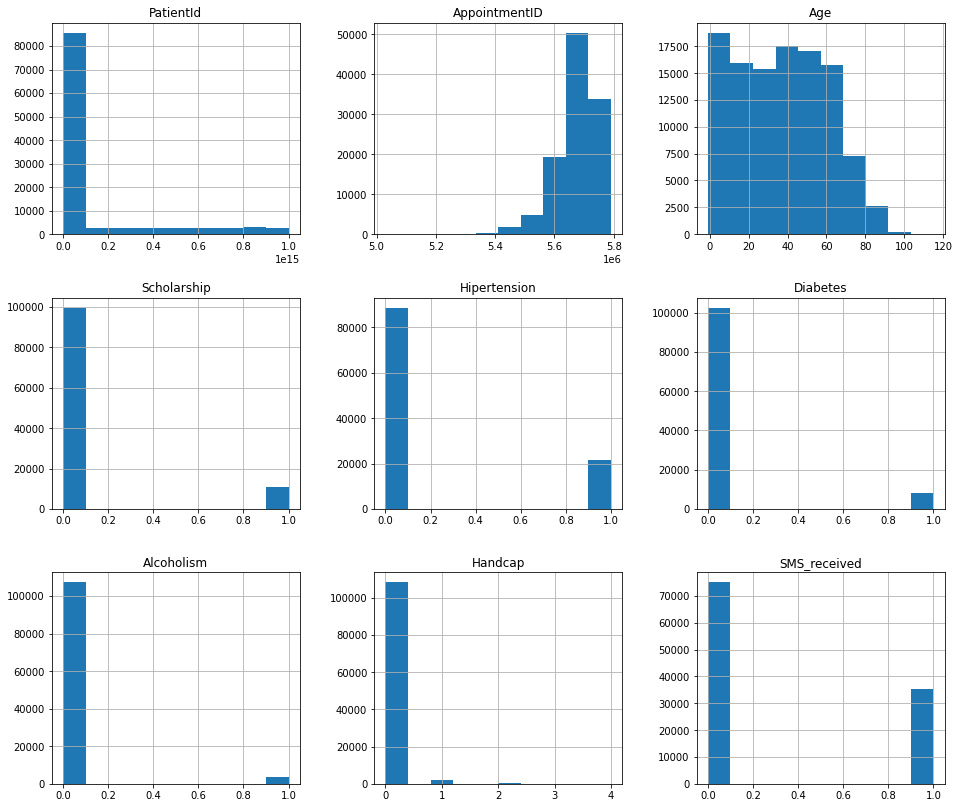

In [60]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('data\KaggleV2-May-2016.csv')

df.hist(figsize=(16,14)) # рисуем гистограмму
experiment.log_figure(figure=plt) # логируем фигуру

In [61]:
# Узнаем число людей каждого возраста
print("Уникальные значение в 'Age' => {}".format(df.Age.unique()))

Уникальные значение в 'Age' => [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


In [62]:
# Удалим аномальные значения возраста
df = df[(df.Age >= 0) & (df.Age <= 110)]
df.Age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
97       11
98        6
100       4
102       2
99        1
Name: Age, Length: 102, dtype: int64

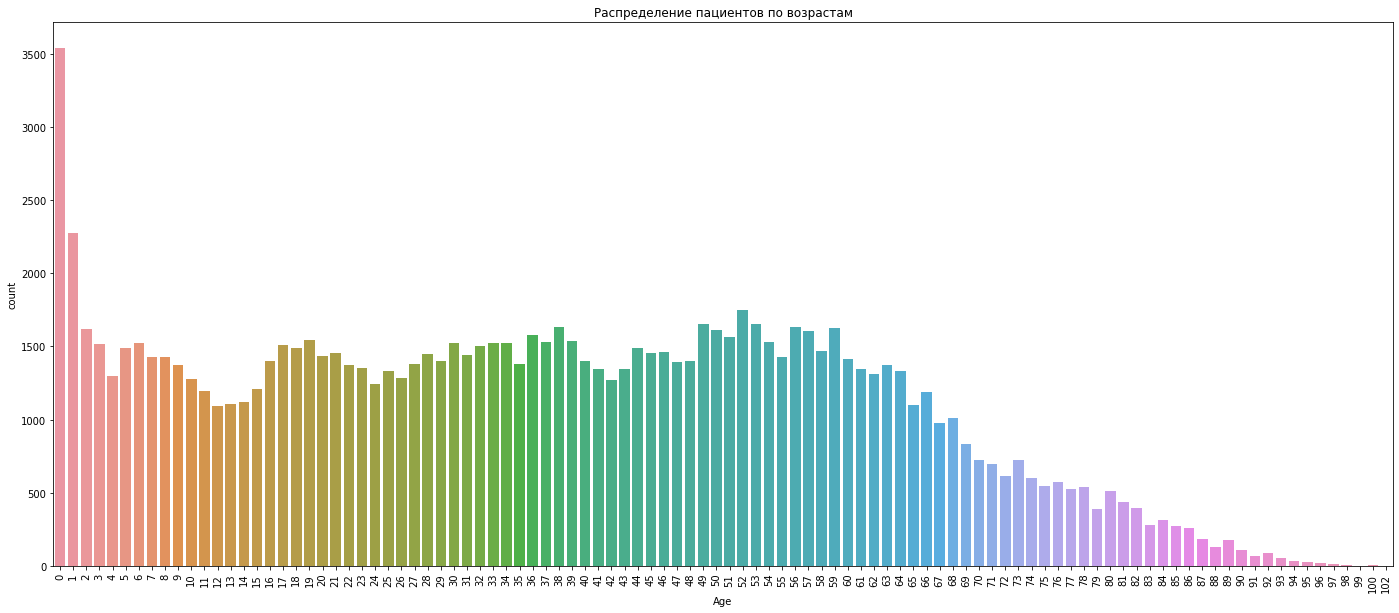

In [63]:
# Создаем столбчатую диаграмму распределения пациентов по возрастам
plt.figure(figsize=(24, 10))
plt.xticks(rotation = 90)
ax = sns.countplot(x = df.Age)
ax.set_title('Распределение пациентов по возрастам')
experiment.log_figure(figure = plt)
plt.show()

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110521 non-null  float64
 1   AppointmentID   110521 non-null  int64  
 2   Gender          110521 non-null  object 
 3   ScheduledDay    110521 non-null  object 
 4   AppointmentDay  110521 non-null  object 
 5   Age             110521 non-null  int64  
 6   Neighbourhood   110521 non-null  object 
 7   Scholarship     110521 non-null  int64  
 8   Hipertension    110521 non-null  int64  
 9   Diabetes        110521 non-null  int64  
 10  Alcoholism      110521 non-null  int64  
 11  Handcap         110521 non-null  int64  
 12  SMS_received    110521 non-null  int64  
 13  No-show         110521 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [65]:
# Кодируем котегориальные признаки
categorical_columns_names = ['Gender', 'Neighbourhood']

# Кодруем методом dummies
encoded_columns = pd.get_dummies(df, columns=categorical_columns_names)

# Удаляем ненужные признаки
encoded_columns.drop(['AppointmentID', 'PatientId', 'ScheduledDay', 'AppointmentDay', 'No-show'], axis=1, inplace=True)
encoded_columns.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Gender_F,Gender_M,Neighbourhood_AEROPORTO,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,62,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,56,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,62,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,56,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
encoded_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 90 columns):
 #   Column                                     Non-Null Count   Dtype
---  ------                                     --------------   -----
 0   Age                                        110521 non-null  int64
 1   Scholarship                                110521 non-null  int64
 2   Hipertension                               110521 non-null  int64
 3   Diabetes                                   110521 non-null  int64
 4   Alcoholism                                 110521 non-null  int64
 5   Handcap                                    110521 non-null  int64
 6   SMS_received                               110521 non-null  int64
 7   Gender_F                                   110521 non-null  uint8
 8   Gender_M                                   110521 non-null  uint8
 9   Neighbourhood_AEROPORTO                    110521 non-null  uint8
 10  Neighbourhood_ANDORINHAS        

In [67]:
# Признак No-show является не цифровым и необходимо закодировать его в 0 и 1
y = df['No-show']
y

0         No
1         No
2         No
3         No
4         No
          ..
110522    No
110523    No
110524    No
110525    No
110526    No
Name: No-show, Length: 110521, dtype: object

In [68]:
# Кодируем признак No-show в 1 и 0
y = y.replace({'No':0, 'Yes':1})
y.value_counts(True)

0    0.798084
1    0.201916
Name: No-show, dtype: float64

In [69]:
# Шкалирование данных
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(encoded_columns)
print(X.shape)

(110521, 90)


In [70]:
# Инициализация модели
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
random_state = 42

# Обучение модели
logreg.fit(X, y)

c:\Users\dmitr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
# Логирование параметров обучения
params = {'random_state':random_state, 'model_state':logreg}
experiment.log_parameters(params)


In [72]:
# Предсказание модели
y_pred = logreg.predict(X)

In [73]:
# Анализ модели
accuracy = accuracy_score(y, y_pred)
print('Доля правильных ответов: {:6.3f}', format(accuracy))

Доля правильных ответов: {:6.3f} 0.7980836221170637


In [74]:
# Логирование метрик
metrics = {'accuracy':accuracy}
experiment.log_metrics(metrics)
experiment.log_confusion_matrix(y.tolist(),
                                y_pred.tolist())
experiment.display()

In [75]:
#experiment.end()

Домашнее задание

In [76]:
# Удаление ненужных признаков
df_hw = pd.read_csv('data\KaggleV2-May-2016.csv')
df_hw.drop(['AppointmentID', 'PatientId', 'ScheduledDay', 'AppointmentDay', 'No-show', 'Gender', 'Neighbourhood'], axis=1, inplace=True)
df_hw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   Age           110527 non-null  int64
 1   Scholarship   110527 non-null  int64
 2   Hipertension  110527 non-null  int64
 3   Diabetes      110527 non-null  int64
 4   Alcoholism    110527 non-null  int64
 5   Handcap       110527 non-null  int64
 6   SMS_received  110527 non-null  int64
dtypes: int64(7)
memory usage: 5.9 MB


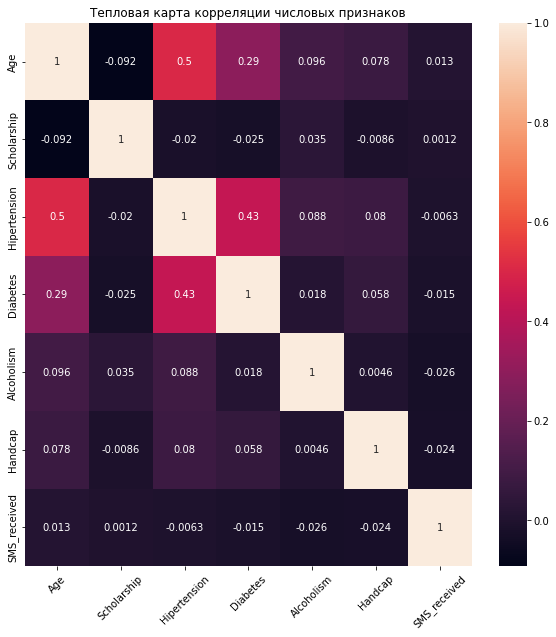

In [77]:
# Создаем тепловую карту корреляции между 7 числовыми признаками
plt.figure(figsize=(10, 10))
plt.xticks(rotation = 45)
ax = sns.heatmap(df_hw.corr(), annot=True)
ax.set_title('Tепловая карта корреляции числовых признаков')
#experiment.log_figure(figure=plt) # логируем фигуру
experiment.log_figure(figure = plt, figure_name='Heatmap correlation')
plt.show()

In [78]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/dmitriy-b/medical-appointment/39dc34759df74fbeb3315cd00b0abeef
COMET INFO:   Metrics:
COMET INFO:     accuracy : 0.7980836221170637
COMET INFO:   Parameters:
COMET INFO:     C                 : 1.0
COMET INFO:     class_weight      : 1
COMET INFO:     dual              : False
COMET INFO:     fit_intercept     : True
COMET INFO:     intercept_scaling : 1
COMET INFO:     l1_ratio          : 1
COMET INFO:     max_iter          : 100
COMET INFO:     model_state       : LogisticRegression()
COMET INFO:     multi_class       : auto
COMET INFO:     n_jobs            : 1
COMET INFO:     penalty           : l2
COMET INFO:     random_state      : 42
COMET INFO:     solver            : lbfgs
COMET INFO:     tol               : 0.0001
COMET INFO:     verbos